 # **Ejercicio 3**
 # **Predict New Medicines with BELKA**
 ## **Modelos de Clasificación**.
Considere el conjunto de datos `NeurIPS 2024- Predict New Medicines with BELKA`. Implemente la versión de clasificación para cada uno de los modelos estudiados en clases, esto es Regresión Logística y KNN. Construir una tabla de error que contenga las métricas usuales de clasificación: precission, recall, f1-score, AUC. Además, agregue matrices de confusión (ver confusion_matrix) y curvas ROC (ver plot_roc). Puede utilizar la librería GridSearchCV y Pipeline para evaluar cada modelo. Verifique que la validación cruzada seleccionada es la adecuada, y justifíquelo. Utilice la métrica AUC, para seleccionar el mejor modelo de clasificación (maximizar AUC). Los resultados deben estar registrados en una tabla de error (ver Tabla 1) que resuma cada score obtenido por modelo implementado.

**Cuadro 1: Modelo de clasificación para detección de fraude**

| **Modelo**            | **precision** | **recall** | **f1-score** | **AUC** |
|-----------------------|---------------|------------|--------------|---------|
| K-NN                  | ...        | ...          | ...           | ...       |
| Logistic Regression   | ...           | ...          | ...            | ...       |





## **Librerías y módulos necesarios**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## **Bases de datos**

Después de realizar el análisis descriptivo de la base de datos y codificar las variables, los datos se filtraron por proteínas y se dividieron en tres conjuntos. Cada uno de estos conjuntos contiene 100,000 observaciones por proteína, y para facilitar su manejo, los resultados se guardaron en formato CSV.

Los tres archivos resultantes, que serán leídos posteriormente, son:

*   `proteina1.csv`: Datos filtrados para la proteína SEH.
*   `proteina2.csv`: Datos filtrados para la proteína BRD4.
*   `proteina3.csv`: Datos filtrados para la proteína HSA.

In [3]:
proteina1 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina1.csv')
proteina2 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina2.csv')
proteina3 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina3.csv')

## **Notas**

Para la implementación de cada modelo (`KNN` y `LogisticRegression`) correspondiente a cada proteína se tendrá en cuenta lo siguiente:

- Para dividir el conjunto de datos en conjuntos de entrenamiento y prueba, se usará `stratify = y`, con el objetivo de mantener la proporción de la clase en ambos conjuntos, dependiendo de la proporción del conjunto de etiquetas. 

- En cada uno de los `pipelines` construidos se hará uso de un scaler estándar `StandardScaler`. Esto ayuda a ajustar las características de los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es especialmente importante para algoritmos como `KNN` y `LogisticRegression`, ya que su rendimiento puede verse afectado por la escala de las características. En el caso de `KNN`, la distancia entre puntos es fundamental para realizar predicciones, y una escala inapropiada podría dar mayor peso a ciertas características. En `LogisticRegression`, una escala uniforme asegura que el algoritmo pueda optimizar eficientemente los coeficientes sin que las características de mayor magnitud dominen.

- En la validación cruzada se usará `StratifiedKFold` dado la naturaleza de los datos. Al usar `StratifiedKFold` nos aseguramos de que cada pliegue contenga aproximadamente la misma proporción de clases que en el conjunto de datos original. Esto garantiza una evaluación más consistente de los modelos, especialmente en escenarios como este conjunto de datos donde existe un desequilibrio de clases. Esto también ayuda a evitar problemas de sobreajuste o subajuste debido a la distribución desequilibrada de los datos en los pliegues.

- Finalmente, se usará como métrica AUC, ya que permite medir el rendimiento del modelo en términos de su capacidad para distinguir entre las clases. AUC es especialmente útil en problemas de clasificación binaria y con clases desbalanceadas como este caso, dado que considera tanto la tasa de verdaderos positivos como la tasa de falsos positivos, proporcionando una visión más completa del rendimiento del modelo.


## **Modelos proteína 1 (SEH)**


Se verifica que se hayan leído los datos correctamente con el método `head()`
para visualizar las primeras filas y usando el atributo `shape` para revisar que se hayan leído todas las filas y columnas.

In [4]:
proteina1.head()

,binds,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(F)c(F)c1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)nc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1c2c(cc3c1CCC3)CCC2,buildingblock3_smiles_Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,buildingblock3_smiles_Nc1cc(Cl)ccc1F,buildingblock3_smiles_Nc1cc(F)c(F)cc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)CNCC2,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ncco1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
proteina1.shape

(100000, 100)

Luego, se realiza la separación de las variables del conjunto de datos `proteina1`. Almacenando en `X1` todas las columnas del conjunto de datos, excepto la columna binds usando el método `drop()`, y en `y1` los valores de la columna binds, que representa la variable dependiente o el objetivo del modelo.

In [6]:
X1 = proteina1.drop(columns = ['binds'])
y1 = proteina1['binds']

Seguido, se realiza la partición del conjunto de datos utilizando el método `train_test_split()`, configurando el parámetro `stratify` igual al conjunto de etiquetas (`stratify = y1`). Además se fija un `random_state = 11`.

Luego se verifica el tamaño del conjunto de entrentamiento y el de test.

In [7]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, random_state = 11)

In [8]:
len(y_train1)

75000

In [9]:
len(y_test1)

25000

### **Modelo KNN**

A continuación, se procede a la construcción del pipeline, donde se especifica que primero se debe realizar el escalamiento de los datos mediante el método `StandardScaler()` y, posteriormente, ajustar el modelo de clasificación, que en este caso es `KNeighborsClassifier()`. Se utiliza el `param_grid_knn1` para definir los hiperparámetros a evaluar, donde se especifica el número de vecinos del modelo y el peso que toma cada uno de ellos. Seguido a ello, se construye el esquema de validación cruzada mediante el método `StratifiedKFold()`. Finalmente, se aplica el método `GridSearchCV()` con cada uno de los argumentos correspondientes y tomando en cuenta la métrica ROC AUC.

In [28]:
pipeline_knn1 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn1 = [{ 'clasificador__n_neighbors': range(2 , 100),
                     'clasificador__weights': ['distance']}]

kf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met1 = GridSearchCV(pipeline_knn1, param_grid_knn1, cv = kf1, scoring = 'roc_auc')

Ahora, se entrena el modelo y se imprimen los resultados

In [29]:
grid_met1.fit(X_train1, y_train1)
print("Mejor parámetro:", grid_met1.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met1.best_score_)

# Predicción en conjunto de prueba
y_pred1 = grid_met1.predict(X_test1)
prob_knn1 = grid_met1.predict_proba(X_test1)[:, 1] #Esta parte extrae solo la columna correspondiente a la clase positiva (1). 

# AUC en conjunto de prueba
auc_prueba1 = roc_auc_score(y_test1, prob_knn1)
print("Mejor AUC en conjunto de prueba: ", auc_prueba1)


Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.9270946237569136
Mejor AUC en conjunto de prueba:  0.9290624649594933


El modelo K-NN con **99** vecinos y pesos basados en la distancia ha logrado un buen rendimiento. En el conjunto de entrenamiento, se obtiene un AUC de **0.927**, lo que indica que el modelo es capaz de separar correctamente las clases con un alto nivel de precisión. 

En el conjunto de prueba, el AUC es de **0.929**, lo cual confirma que el rendimiento del modelo se mantiene estable al enfrentarse a datos no vistos. La similitud entre los AUC en entrenamiento y prueba no sugiere indicios de sobreajuste o subajuste.

### **Modelo Regresión Logística**

En esta parte, procedemos de forma similar al método anterior, con la diferencia de que en este caso los hiperparámetros corresponden a diferentes valores que toma el parámetro `C`, necesarios para aplicar la `LogisticRegression()` con un máximo de iteraciones del modelo de 1000.


In [30]:
pipeline_rl1 = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr1 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl1 = GridSearchCV(pipeline_rl1, param_grid_lr1, cv = kf1, scoring = 'roc_auc')

In [31]:
grid_rl1.fit(X_train1, y_train1)
print("Mejor parámetro:", grid_rl1.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl1.best_score_)

# Predicción en conjunto de prueba
y_pred1 = grid_rl1.predict(X_test1)
prob_knn11 = grid_rl1.predict_proba(X_test1)[:, 1] 

# AUC en conjunto de prueba
auc_prueba11 = roc_auc_score(y_test1, prob_knn11)
print("Mejor AUC en conjunto de prueba: ", auc_prueba11)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.9492389162354249
Mejor AUC en conjunto de prueba:  0.9505888338168922


Los resultados muestran que el modelo de **Logistic Regression**, con un valor de **C = 0.01** (que controla la regularización), logró un AUC de **0.949** en el conjunto de entrenamiento. Este valor indica que el modelo tiene un excelente rendimiento para distinguir entre las clases positivas y negativas. 

En el conjunto de prueba, el modelo alcanzó un AUC de **0.950**, lo que refleja un rendimiento consistente y similar al de entrenamiento


### **Cuadro 1**

Ahora se realizan predicciones utilizando diferentes métricas: `precision`, `recall`, `F1-Score` y `ROC_AUC`, para evaluar el rendimiento de cada modelo utilizado.

In [32]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP1 = grid_met1.predict(X_test1)
LYP1 = grid_rl1.predict(X_test1)

prob_knn1 = grid_met1.predict_proba(X_test1)[:, 1]
prob_lr1 = grid_rl1.predict_proba(X_test1)[:, 1]

# Evalua las predicciones en cada métrica con las etiquetas del test

tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test1, KYP1), # K-NN
        precision_score(y_test1, LYP1) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test1, KYP1),
        recall_score(y_test1, LYP1)
    ],
    'F1 Score': [
        f1_score(y_test1, KYP1),
        f1_score(y_test1, LYP1)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test1, prob_knn1),
        roc_auc_score(y_test1, prob_lr1)
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.653846,0.277174,0.389313,0.929062
1,Regresión logística,0.594059,0.326087,0.421053,0.950589


El modelo K-NN muestra una buena precisión (0.653846), lo que significa que es relativamente efectivo en la predicción de moléculas que realmente se adhieren. Sin embargo, tiene un bajo recall (0.277174), lo que indica que pierde muchas moléculas que deberían haber sido identificadas como adherentes. Por otro lado, el modelo de regresión logística, tiene una precisión ligeramente más baja (0.594059) que K-NN, pero un mejor recall (0.326087), lo que significa que puede identificar un mayor número de moléculas aglutinantes. 


### **Matrices de confusión**

Para tener una mejor visualización de los datos, la matriz de confusión nos permite saber cuantas observaciones se clasifican como bien predichas o falsos positivos o negativos. Se hacen dos matrices de confusión, una para el modelo KNN y otra para Regresión Logistica.

In [33]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

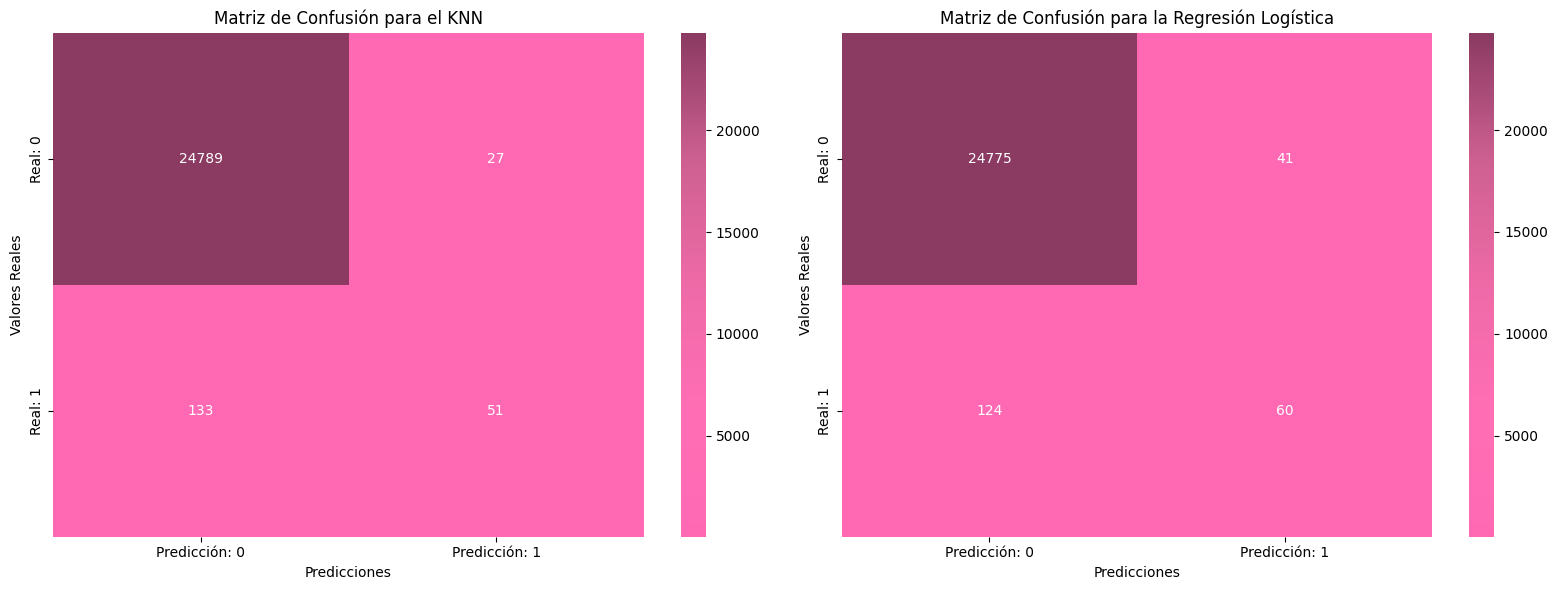

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn1 = KYP1
cm_knn1 = confusion_matrix(y_test1, y_pred_knn1)
sns.heatmap(cm_knn1, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr1 = LYP1
cm_logistic1 = confusion_matrix(y_test1, y_pred_lr1)  # Crear la matriz de confusión
sns.heatmap(cm_logistic1, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


Al ver las matrices de confusión se puede decir lo siguiente: 

* En el K-NN, de las 24816 muestras negativas (clase 0), 27 fueron mal clasificadas como positivas (clase 1). De las 184 muestras positivas (clase 1), 51 fueron clasificadas correctamente, lo que muestra un bajo rendimiento en la detección de positivos.

* En la Regresión Logística, de las 24816 muestras negativas, 41 fueron mal clasificadas como positivas. Sin embargo, de las 184 muestras positivas, 60 fueron correctamente clasificadas, mejorando la detección de positivos frente al K-NN, aunque con más falsos positivos.

En resumen, la regresión logística ofrece un mejor equilibrio en la clasificación de positivos que el K-NN, aunque comete más errores en negativos.

### **Curvas ROC**

Ahora, se hace la construcción de las curvas ROC para evaluar el rendimiento de un modelo de clasificación. Su objetivo es medir qué tan bien un modelo separa las clases positivas de las negativas. Un buen modelo tendrá una curva que se acerca al área superior izquierda, indicando una alta capacidad de discriminación entre las clases.

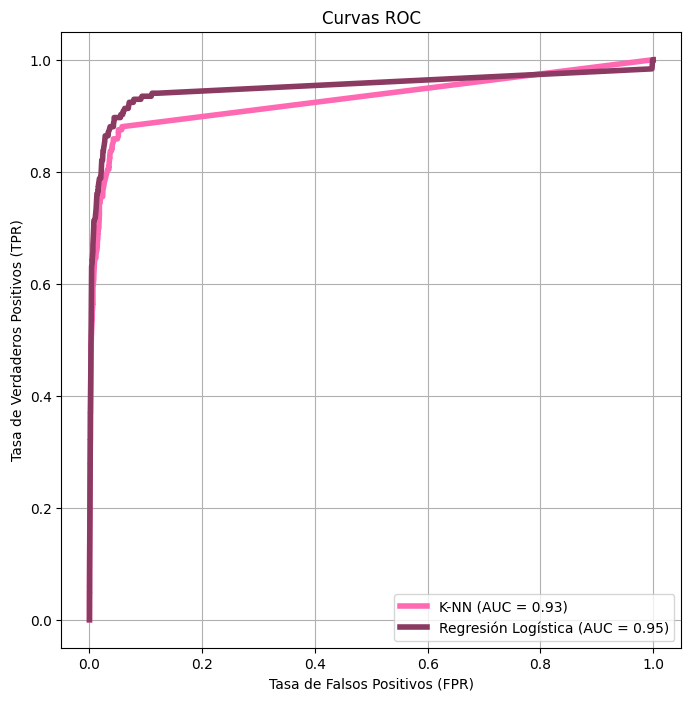

In [35]:
y_pred_prob_knn1 = grid_met1.predict_proba(X_test1)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr1 = grid_rl1.predict_proba(X_test1)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn1, tpr_knn1, _ = roc_curve(y_test1, y_pred_prob_knn1)
roc_auc_knn1 = roc_auc_score(y_test1, y_pred_prob_knn1)

# Valores para la curva ROC para Regresión Logística
fpr_lr1, tpr_lr1, _ = roc_curve(y_test1, y_pred_prob_lr1)
roc_auc_lr1 = roc_auc_score(y_test1, y_pred_prob_lr1)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn1, tpr_knn1, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn1:.2f})', lw = 4)
plt.plot(fpr_lr1, tpr_lr1, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr1:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



La gráfica muestra las curvas ROC para los modelos K-NN y Regresión Logística. La curva de Regresión Logística tiene un área bajo la curva (AUC) de 0.95, lo que indica un excelente rendimiento al separar las clases positivas y negativas. En comparación, la curva del modelo K-NN tiene un AUC de 0.93, que, aunque es bueno, es inferior al de la Regresión Logística. Esto significa que la regresión logística tiene una mejor capacidad para distinguir correctamente entre clases que el K-NN.


Esto confirma que la regresión logística es mucho más efectiva que K-NN para separar correctamente las clases en este conjunto de datos (proteina 1).

## **Modelos proteína 2 (BRD4)**


Se verifica que se hayan leído los datos correctamente con el método `head()`
para visualizar las primeras filas y usando el atributo `shape` para revisar que se hayan leído todas las filas y columnas.

In [36]:
proteina2.head()

,binds,buildingblock1_smiles_CC(C)(C)OC(=O)CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)(C)OCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_Cc1ccccc1[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_N#Cc1ccc(C[C@@H](NC(=O)OCC2c3ccccc3-c3ccccc32)C(=O)O)cc1,buildingblock1_smiles_O=C(NC(CC1CCCCC1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(CCc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cc(Cl)c(O)c(Cl)c1,buildingblock3_smiles_Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2[nH]ncc2c1,buildingblock3_smiles_Nc1ccc2c(c1)CCC2=O,buildingblock3_smiles_Nc1ccc2c(c1)CNC2=O,buildingblock3_smiles_Nc1ccc2c(c1)COC2=O,buildingblock3_smiles_Nc1cccnc1F,buildingblock3_smiles_Nc1nc2ccccc2s1,buildingblock3_smiles_Nc1nc2nc[nH]c2c(=O)[nH]1,buildingblock3_smiles_Nc1nccs1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
proteina2.shape

(100000, 100)

Luego, se realiza la separación de las variables del conjunto de datos `proteina2`. Almacenando en `X2` todas las columnas del conjunto de datos, excepto la columna binds usando el método `drop()`, y en `y2` los valores de la columna binds, que representa la variable dependiente o el objetivo del modelo.

In [38]:
X2 = proteina2.drop(columns = ['binds'])
y2 = proteina2['binds']

Seguido, se realiza la partición del conjunto de datos utilizando el método `train_test_split()`, configurando el parámetro `stratify` igual al conjunto de etiquetas (`stratify = y2`). Además se fija un `random_state = 11`.

Luego se verifica el tamaño del conjunto de entrentamiento y el de test.

In [39]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify = y2, random_state = 11)

In [40]:
len(y_train2)

75000

In [41]:
len(y_test2)

25000

### **Modelo KNN**

Siguiendo, se repite el mismo proceso y con los mismos hiperparámetros que la `proteina1` para el modelo `KNN`

In [42]:
pipeline_knn2 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn2 = [{ 'clasificador__n_neighbors': range(2 , 100),# Número de vecinos del modelo
                   'clasificador__weights': ['distance']}]

kf2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met2 = GridSearchCV(pipeline_knn2, param_grid_knn2, cv = kf2, scoring = 'roc_auc')

In [43]:
grid_met2.fit(X_train2, y_train2)
print("Mejor parámetro:", grid_met2.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met2.best_score_)

# Predicción en conjunto de prueba
y_pred2 = grid_met2.predict(X_test2)
prob_knn2 = grid_met2.predict_proba(X_test2)[:, 1] #Esta parte extrae solo la columna correspondiente a la clase positiva (1). 

# AUC en conjunto de prueba
auc_prueba2 = roc_auc_score(y_test2, prob_knn2)
print("Mejor AUC en conjunto de prueba: ", auc_prueba2)

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.8544641322352771
Mejor AUC en conjunto de prueba:  0.853590314230443


Este resultado muestra que el modelo **K-NN**, con **99 vecinos** y pesos basados en la distancia (priorizando la cercanía de los vecinos), alcanzó un AUC de **0.8546** en el conjunto de entrenamiento. Esto indica que el modelo tiene un buen rendimiento para separar correctamente las clases en los datos de entrenamiento.

En el conjunto de prueba, el modelo logró un AUC de **0.8536**, lo cual es muy cercano al valor obtenido en el conjunto de entrenamiento. Esto sugiere que el modelo está generalizando bien a los datos, sin signos de sobreajuste. 



### **Modelo Regresión Logística**

Siguiendo, se repite el mismo proceso y con los mismos hiperparámetros que la `proteina1` para el modelo `Regresión Logistica`

In [44]:
pipeline_rl2 = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr2 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl2 = GridSearchCV(pipeline_rl2, param_grid_lr2, cv = kf2, scoring = 'roc_auc')

In [45]:
grid_rl2.fit(X_train2, y_train2)
print("Mejor parámetro:", grid_rl2.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl2.best_score_)

# Predicción en conjunto de prueba
y_pred22 = grid_rl2.predict(X_test2)
prob_knn22 = grid_rl2.predict_proba(X_test2)[:, 1] 

# AUC en conjunto de prueba
auc_prueba22 = roc_auc_score(y_test2, prob_knn22)
print("Mejor AUC en conjunto de prueba: ", auc_prueba22)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.9350363467583321
Mejor AUC en conjunto de prueba:  0.937688287446857


Este resultado muestra que el modelo de **Regresión Logística**, con un valor de **C = 0.01** (que implica una regularización fuerte), alcanzó un AUC de **0.9350** en el conjunto de entrenamiento.En el conjunto de prueba, el modelo logró un AUC de **0.9377**, lo que es muy cercano al valor obtenido en el conjunto de entrenamiento. Esta consistencia entre ambos conjuntos indica que el modelo tiene una buena capacidad de generalización, evitando problemas de sobreajuste. 


### **Cuadro 1**

Ahora se realizan predicciones utilizando diferentes métricas: `precision`, `recall`, `F1-Score` y `ROC_AUC`, para evaluar el rendimiento de cada modelo utilizado.

In [46]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP2 = grid_met2.predict(X_test2)
LYP2 = grid_rl2.predict(X_test2)

prob_knn2 = grid_met2.predict_proba(X_test2)[:, 1]
prob_lr2 = grid_rl2.predict_proba(X_test2)[:, 1]

tabla2 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test2, KYP2), # K-NN
        precision_score(y_test2, LYP2) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test2, KYP2),
        recall_score(y_test2, LYP2)
    ],
    'F1 Score': [
        f1_score(y_test2, KYP2),
        f1_score(y_test2, LYP2)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test2, prob_knn2),
        roc_auc_score(y_test2, prob_lr2)
    ]
}

cuadro2 = pd.DataFrame(tabla2)
cuadro2

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.800000,0.068966,0.126984,0.853590
1,Regresión logística,0.615385,0.137931,0.225352,0.937688


El modelo **K-NN** muestra una buena precisión (**0.80**), lo que indica que es eficaz para predecir correctamente las moléculas que realmente se adhieren. Sin embargo, tiene un bajo recall (**0.068966**), lo que sugiere que el modelo no está identificando muchas moléculas que deberían haber sido clasificadas como adherentes. Esto puede darse dado al desbalance del conjunto de datos

Por otro lado, el modelo de **Regresión Logística** tiene una precisión más baja (**0.615385**) en comparación con K-NN, pero presenta un mejor recall (**0.137931**). Esto significa que el modelo es más eficiente en la identificación de moléculas aglutinantes en comparación con K-NN, aunque su precisión no es tan alta. 

### **Matrices de confusión**

Para tener una mejor visualización de los datos, la matriz de confusión nos permite saber cuantas observaciones se clasifican como bien predichas o falsos positivos o negativos. Se hacen dos matrices de confusión, una para el modelo KNN y otra para Regresión Logistica.

In [47]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

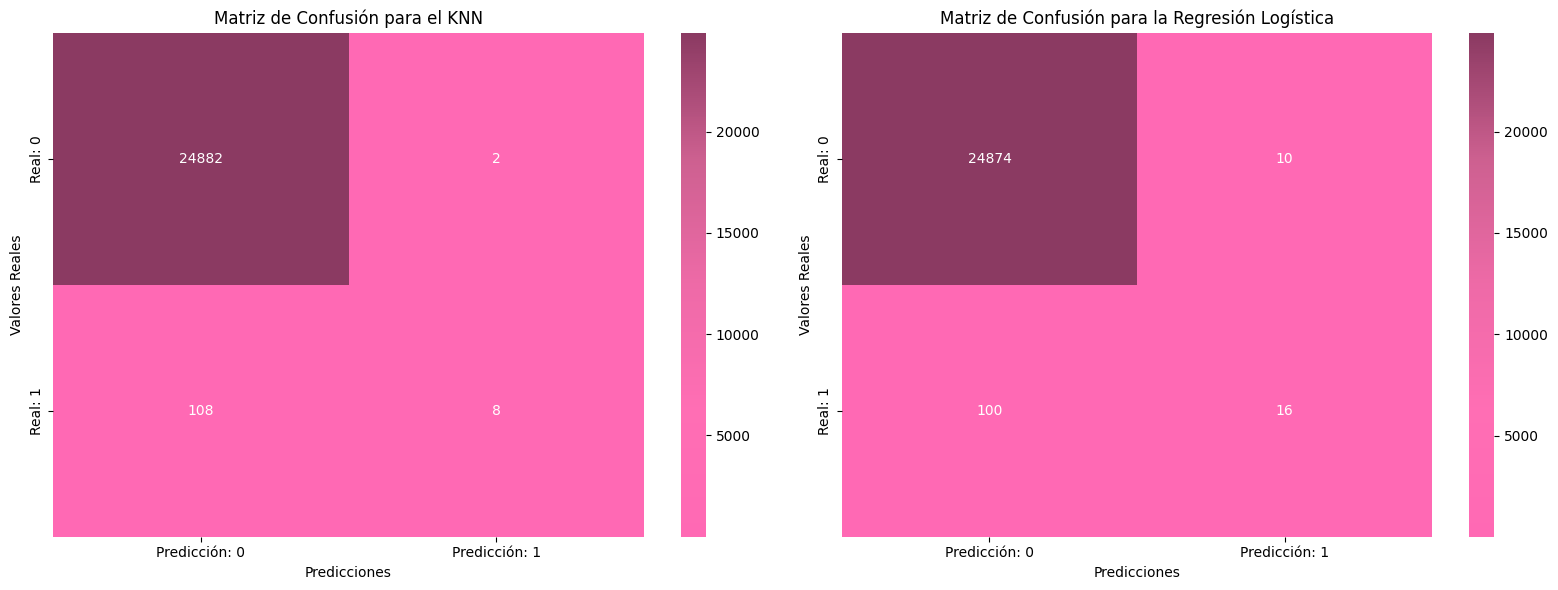

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn2 = KYP2
cm_knn2 = confusion_matrix(y_test2, y_pred_knn2)
sns.heatmap(cm_knn2, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr2 = LYP2
cm_logistic2 = confusion_matrix(y_test2, y_pred_lr2)  # Crear la matriz de confusión
sns.heatmap(cm_logistic2, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


Al observar las matrices de confusión, se puede concluir lo siguiente:

- En el **K-NN**, de las **24884** muestras negativas (clase 0), **2** fueron mal clasificadas como positivas (clase 1). Sin embargo, de las **116** muestras positivas (clase 1), solo **8** fueron clasificadas correctamente. Esto evidencia un bajo rendimiento en la detección de positivos, ya que la mayoría de los casos positivos fueron clasificados incorrectamente como negativos.

- En la **Regresión Logística**, de las **24874** muestras negativas, **10** fueron mal clasificadas como positivas. De las **116** muestras positivas, **16** fueron correctamente clasificadas. Aunque la regresión logística también presenta falsos positivos, mejora en la detección de los casos positivos en comparación con K-NN.

### **Curvas ROC**

Ahora, se hace la construcción de las curvas ROC para evaluar el rendimiento de un modelo de clasificación, y poder mostrar la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos en diferentes umbrales de decisión. 

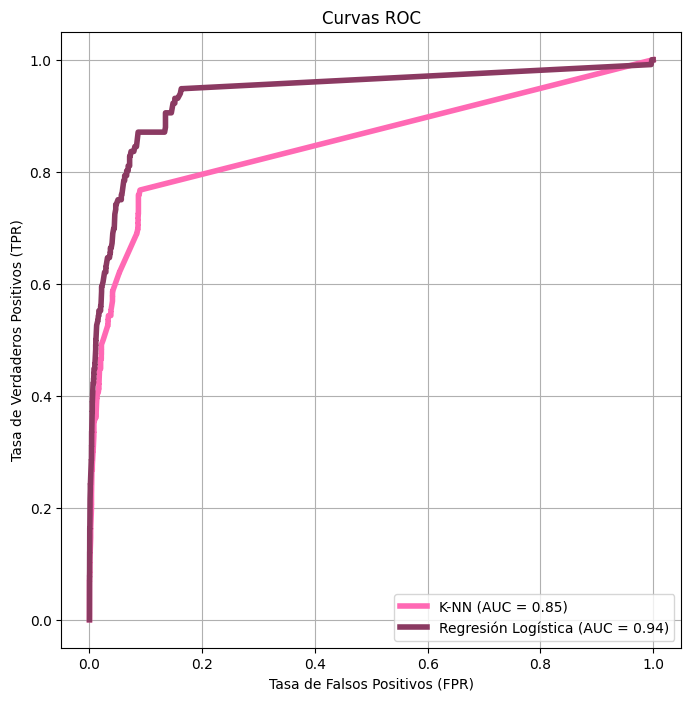

In [49]:
y_pred_prob_knn2 = grid_met2.predict_proba(X_test2)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr2 = grid_rl2.predict_proba(X_test2)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn2, tpr_knn2, _ = roc_curve(y_test2, y_pred_prob_knn2)
roc_auc_knn2 = roc_auc_score(y_test2, y_pred_prob_knn2)

# Valores para la curva ROC para Regresión Logística
fpr_lr2, tpr_lr2, _ = roc_curve(y_test2, y_pred_prob_lr2)
roc_auc_lr2 = roc_auc_score(y_test2, y_pred_prob_lr2)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn2, tpr_knn2, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn2:.2f})', lw = 4)
plt.plot(fpr_lr2, tpr_lr2, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr2:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


La gráfica muestra las curvas ROC para los modelos **K-NN** y **Regresión Logística**.

- La **Regresión Logística** tiene un área bajo la curva (**AUC**) de **0.94**, lo que indica un excelente rendimiento en la discriminación entre clases positivas y negativas. Esto significa que el modelo es altamente efectivo para predecir correctamente las clases en este conjunto de datos.

- El modelo **K-NN** tiene un **AUC** de **0.85**, lo que indica un buen rendimiento, pero significativamente inferior al de la Regresión Logística.




En conclusión, la **Regresión Logística** es mucho más efectiva que **K-NN** para separar correctamente las clases, lo que sugiere que, la regresión logística es el mejor modelo para predecir la adherencia de moléculas a las proteínas.

## **Modelos proteína 3 (HSA)**


Se verifica que se hayan leído los datos correctamente con el método `head()`
para visualizar las primeras filas y usando el atributo `shape` para revisar que se hayan leído todas las filas y columnas.

In [50]:
proteina3.head()

,binds,buildingblock1_smiles_CC(C)(C)OC(=O)CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_Cc1cc(Cl)cc(C(=O)O)c1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_Cc1ccc(C(=O)O)cc1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(CC1CCCCC1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(-c2ccccc2)cc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cc(C(=O)O)cc(C(=O)O)c1)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cn[nH]c1,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2cc(F)ccc12,buildingblock3_smiles_Nc1nc(Cl)c2[nH]cnc2n1,buildingblock3_smiles_Nc1nc2c(s1)CN(C(=O)OCc1ccccc1)CC2,buildingblock3_smiles_Nc1nc[nH]n1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
proteina3.shape

(100000, 100)

Luego, se realiza la separación de las variables del conjunto de datos `proteina3`. Almacenando en `X3` todas las columnas del conjunto de datos, excepto la columna binds usando el método `drop()`, y en `y3` los valores de la columna binds, que representa la variable dependiente o el objetivo del modelo.

In [52]:
X3 = proteina3.drop(columns = ['binds'])
y3 = proteina3['binds']

Seguido, se realiza la partición del conjunto de datos utilizando el método `train_test_split()`, configurando el parámetro `stratify` igual al conjunto de etiquetas (`stratify = y3`). Además se fija un `random_state = 11`.

Luego se verifica el tamaño del conjunto de entrentamiento y el de test.

In [53]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, stratify = y3, random_state = 11)

In [45]:
len(y_train3)

75000

In [54]:
len(y_test3)

25000

### **Modelo KNN**

Siguiendo, se repite el mismo proceso y con los mismos hiperparámetros que la `proteina1` para el modelo `KNN`

In [55]:
pipeline_knn3 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn3 = [{ 'clasificador__n_neighbors': range(2 , 100),# Número de vecinos del modelo
                   'clasificador__weights': ['distance']}]

kf3 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met3 = GridSearchCV(pipeline_knn3, param_grid_knn3, cv = kf3, scoring = 'roc_auc')

In [56]:
grid_met3.fit(X_train3, y_train3)
print("Mejor parámetro:", grid_met3.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met3.best_score_)

# Predicción en conjunto de prueba
y_pred3 = grid_met3.predict(X_test3)
prob_knn3 = grid_met3.predict_proba(X_test3)[:, 1]  

# AUC en conjunto de prueba
auc_prueba3 = roc_auc_score(y_test3, prob_knn3)
print("Mejor AUC en conjunto de prueba: ", auc_prueba3)

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.8223059443930285
Mejor AUC en conjunto de prueba:  0.8065904161311055


El modelo K-NN con **99** vecinos y pesos basados en la distancia ha logrado un rendimiento aceptable. En el conjunto de entrenamiento, se obtiene un AUC de **0.822**, lo que indica que el modelo es capaz de separar correctamente las clases con un buen nivel de precisión en los datos de entrenamiento.

En el conjunto de prueba, el AUC es de **0.807**, lo cual sugiere que el rendimiento del modelo es bueno.


### **Modelo Regresión Logística**

Siguiendo, se repite el mismo proceso y con los mismos hiperparámetros que la `proteina1` para el modelo `Regresión Logistica`

In [57]:
pipeline_rl3 = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr3 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf3 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl3 = GridSearchCV(pipeline_rl3, param_grid_lr3, cv = kf3, scoring = 'roc_auc')


In [58]:
grid_rl3.fit(X_train3, y_train3)
print("Mejor parámetro:", grid_rl3.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl3.best_score_)

# Predicción en conjunto de prueba
y_pred33 = grid_rl3.predict(X_test3)
prob_knn33 = grid_rl3.predict_proba(X_test3)[:, 1] 

# AUC en conjunto de prueba
auc_prueba33 = roc_auc_score(y_test3, prob_knn33)
print("Mejor AUC en conjunto de prueba: ", auc_prueba33)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.8985993904078861
Mejor AUC en conjunto de prueba:  0.857072537139114


El modelo de **Regresión Logística**, con un valor de **C = 0.01** , logró un AUC de **0.899** en el conjunto de entrenamiento. En el conjunto de prueba, el AUC fue de **0.857**, lo que indica un buen rendimiento al enfrentarse a estos datos. Aunque hay una leve disminución en el AUC respecto al conjunto de entrenamiento, no parece haber signos de sobreajuste significativos. 


### **Cuadro 1**

Ahora se realizan predicciones utilizando diferentes métricas: `precision`, `recall`, `F1-Score` y `ROC_AUC`, para evaluar el rendimiento de cada modelo utilizado.

In [59]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP3 = grid_met3.predict(X_test3)
LYP3 = grid_rl3.predict(X_test3)

prob_knn3 = grid_met3.predict_proba(X_test3)[:, 1]
prob_lr3 = grid_rl3.predict_proba(X_test3)[:, 1]

tabla3 = {
    'Modelo': ['K-nn', 'Regresión logística'],
        'Precisión': [
            precision_score(y_test3, KYP3),
            precision_score(y_test3, LYP3)
        ],
        'Recall': [
            recall_score(y_test3, KYP3),
            recall_score(y_test3, LYP3)
        ],
        'F1 Score': [
            f1_score(y_test3, KYP3),
            f1_score(y_test3, LYP3)
        ],
        'AUC': [
            roc_auc_score(y_test3, prob_knn3),
            roc_auc_score(y_test3, prob_lr3)
    ]
}

cuadro3 = pd.DataFrame(tabla3)
cuadro3


,Modelo,Precisión,Recall,F1 Score,AUC
0,K-nn,0.416667,0.048077,0.086207,0.806590
1,Regresión logística,0.272727,0.028846,0.052174,0.857073


Al analizar los resultados de los modelos **K-NN** y **Regresión Logística**, se puede observar lo siguiente:

- El modelo **K-NN** presenta una precisión de **0.4167**, lo que indica que algo más del 41% de las predicciones de clase positiva son correctas. Sin embargo, tiene un recall bajo de 0.0481, lo que sugiere que el modelo identifica correctamente menos del 5% de las muestras que realmente pertenecen a la clase positiva. 

- El modelo de **Regresión Logística** tiene una precisión de **0.2727**, inferior a la de K-NN, lo que significa que el 27% de las predicciones positivas son correctas. El recall es aún más bajo, con solo **0.0288**, indicando que menos del 3% de las muestras positivas son correctamente identificadas. 

En conclusión, aunque ambos modelos tienen problemas para identificar correctamente la clase positiva, el modelo de **Regresión Logística** tiene un mejor rendimiento en términos de AUC, lo que indica una mejor capacidad para discriminar entre las clases positivas y negativas, mientras que **K-NN** tiene una mayor precisión en las predicciones positivas.


### **Matrices de confusión**

In [60]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

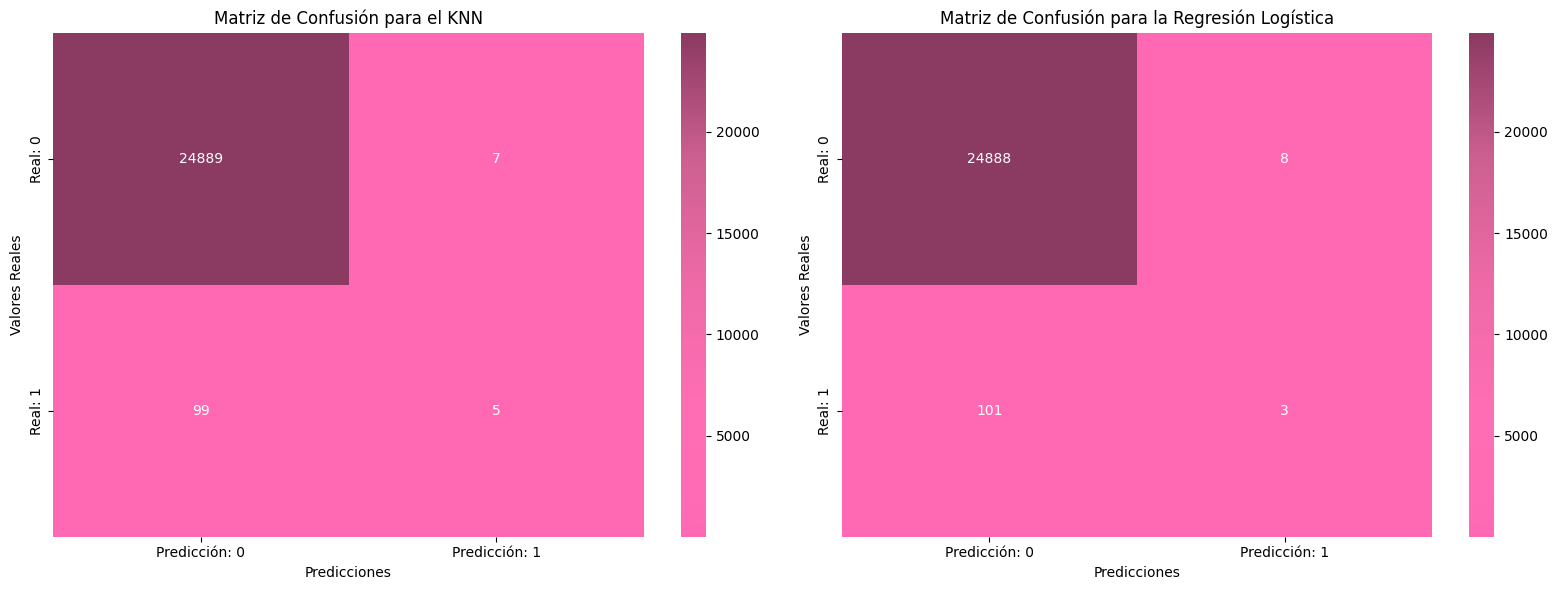

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn3 = KYP3
cm_knn3 = confusion_matrix(y_test3, y_pred_knn3)
sns.heatmap(cm_knn3, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr3 = LYP3
cm_logistic3 = confusion_matrix(y_test3, y_pred_lr3)  # Crear la matriz de confusión
sns.heatmap(cm_logistic3, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


Al observar las matrices de confusión se puede decir lo siguiente:

- En el modelo **K-NN**, de las **24896** muestras negativas (clase 0), **7** fueron mal clasificadas como positivas (clase 1). De las **104** muestras positivas (clase 1), solo **5** fueron correctamente clasificadas como positivas, lo que muestra un bajo rendimiento en la detección de la clase positiva. 

- En el modelo de **Regresión Logística**, de las **24888** muestras negativas, **8** fueron mal clasificadas como positivas. Sin embargo, de las **104** muestras positivas, solo **3** fueron correctamente clasificadas como positivas, lo que también indica un bajo rendimiento en la detección de positivos. 

En conclusión, aunque la regresión logística comete más errores en las muestras negativas que K-NN, ambos modelos tienen dificultades para clasificar correctamente las muestras de la clase positiva.

### **Curvas ROC**

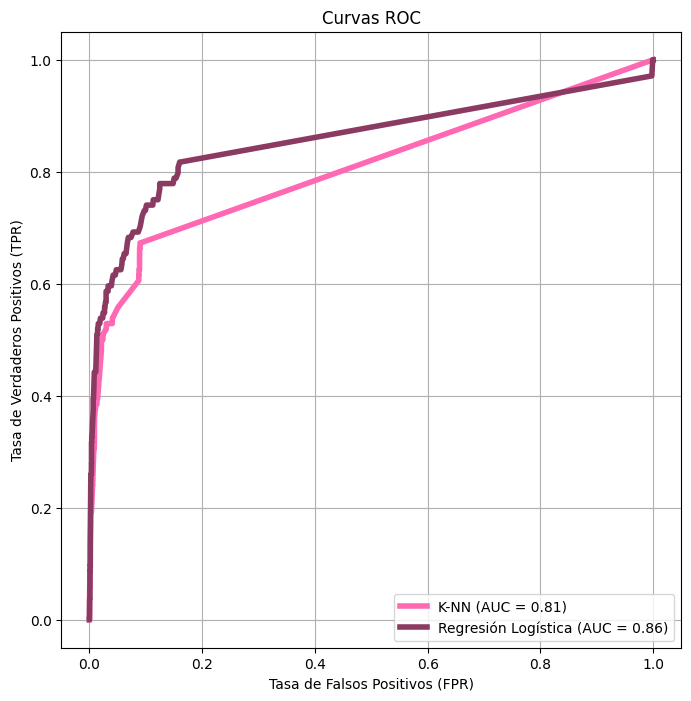

In [62]:
y_pred_prob_knn3 = grid_met3.predict_proba(X_test3)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr3 = grid_rl3.predict_proba(X_test3)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn3, tpr_knn3, _ = roc_curve(y_test3, y_pred_prob_knn3)
roc_auc_knn3 = roc_auc_score(y_test3, y_pred_prob_knn3)

# Valores para la curva ROC para Regresión Logística
fpr_lr3, tpr_lr3, _ = roc_curve(y_test3, y_pred_prob_lr3)
roc_auc_lr3 = roc_auc_score(y_test3, y_pred_prob_lr3)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn3, tpr_knn3, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn3:.2f})', lw = 4)
plt.plot(fpr_lr3, tpr_lr3, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr3:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


La gráfica ROC muestra que el modelo **Regresión Logística** tiene un **AUC** de **0.86**, superando al **K-NN**, que tiene un AUC de **0.81**. Esto indica que la **Regresión Logística** es más efectiva en la discriminación entre clases positivas y negativas, con una curva más estable y consistente. Aunque ambos modelos tienen un rendimiento razonable, la regresión logística demuestra una mayor capacidad de clasificación.